In [1]:
from SearchBasedTester.BasicClasses.InteractivePlotter import InteractivePlotter
from SearchBasedTester.BasicClasses.SampleBase import SampleBase
from SearchBasedTester.BasicClasses.FitnessBase import FitnessBase
import numpy as np
import matplotlib.pyplot as plt
# Autoload packages
%load_ext autoreload
%autoreload 2

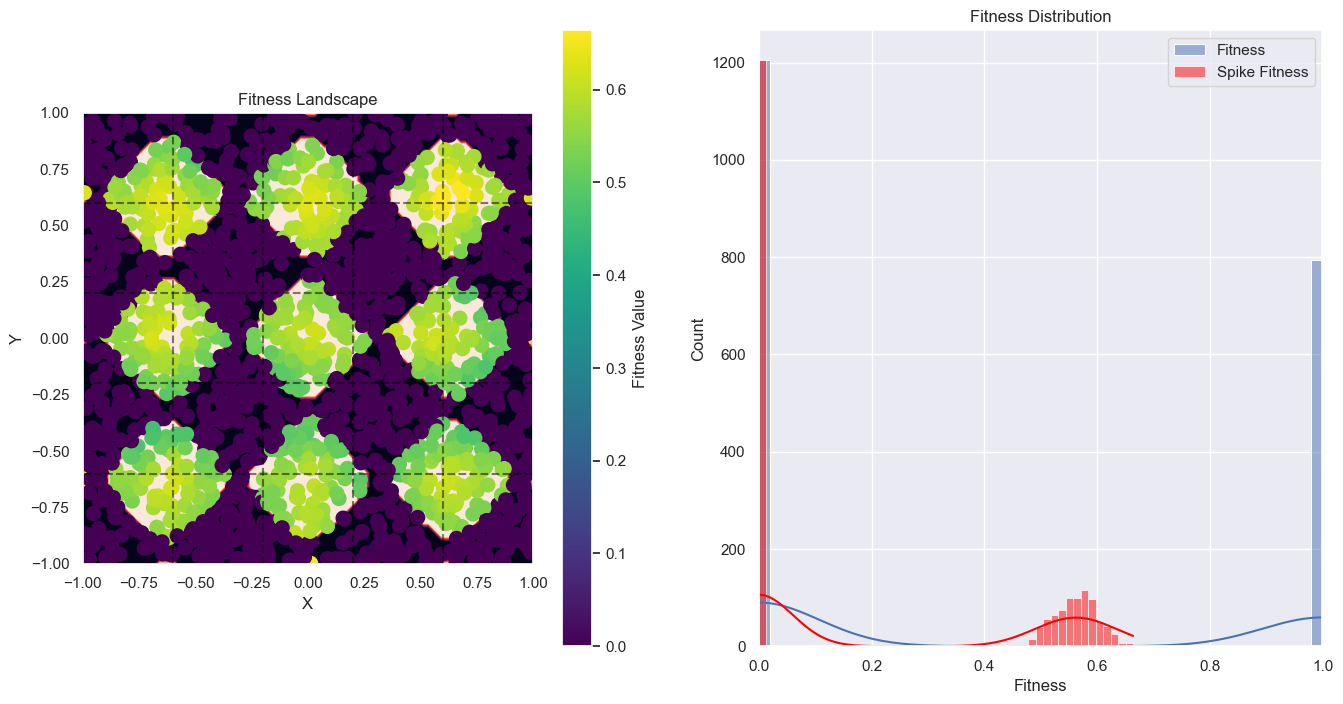

n Neighbours: 709
n Neighbours: 330
n Neighbours: 733
n Neighbours: 324
n Neighbours: 734
n Neighbours: 487
n Neighbours: 735
n Neighbours: 732
n Neighbours: 462
n Neighbours: 736
n Neighbours: 489
n Neighbours: 499
n Neighbours: 468
n Neighbours: 469
n Neighbours: 707
n Neighbours: 318
n Neighbours: 482
n Neighbours: 319
n Neighbours: 326
n Neighbours: 733
n Neighbours: 331
n Neighbours: 483
n Neighbours: 491
n Neighbours: 710
n Neighbours: 313
n Neighbours: 492
n Neighbours: 464
n Neighbours: 497
n Neighbours: 742
n Neighbours: 495
n Neighbours: 713
n Neighbours: 764
n Neighbours: 468
n Neighbours: 321
n Neighbours: 486
n Neighbours: 744
n Neighbours: 497
n Neighbours: 716


KeyboardInterrupt: 

In [ ]:
radius = 0.2
sampleBase = SampleBase([(-1, 1), (-1, 1)], radius)
fitnessBase = FitnessBase()
spikeFitnessBase = FitnessBase()
# f = lambda x,y: (-np.sign(x**2 + y**2 - 0.1) + 1)/2
f = lambda x,y: (np.sign(np.cos(10 * x) + np.cos(10* y) - 0.1) + 1)/2
#f = lambda x,y: x**2 + y**2

interactivePlotter = InteractivePlotter()

def computeSpikeFitness(sample):
    if fitnessBase.getFitness(sample) == 0:
        return 0
    neighbours = sampleBase.getNeighbours(sample)
    distances = np.linalg.norm(neighbours - sample, axis=1)
    trueNeighbours = np.array(neighbours)[distances <= radius]
    spikeFitness = np.mean(fitnessBase.getFitnesses(trueNeighbours))
    return 1 - spikeFitness

refreshRate = 100
for i in range(10000):
    sample = np.random.uniform(-1, 1, 2)
    sampleBase.addSample(sample)
    fitness = f(sample[0], sample[1])
    fitnessBase.writeFitness(sample, fitness)
    neighbours = sampleBase.getNeighbours(sample)
    print('n Neighbours:', len(neighbours))
    distances = np.linalg.norm(neighbours - sample, axis=1)
    trueNeighbours = np.array(neighbours)[distances <= radius]
    spikeFitnesses = np.array([computeSpikeFitness(neighbour) for neighbour in trueNeighbours])
    for j, neighbour in enumerate(trueNeighbours):
        spikeFitness = spikeFitnesses[j]
        spikeFitnessBase.writeFitness(neighbour, spikeFitness)
    if i % refreshRate == 0:
        interactivePlotter(sampleBase, fitnessBase, spikeFitnessBase, f, radius)
